
# Ford-Go-Bike Trip Data

# Data Set
This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.
* Note that this dataset will require some data wrangling in
order to make it tidy for analysis. There are multiple cities
covered by the linked system, and multiple data files will need
to be joined together if a full year’s coverage is desired.
* If you’re feeling adventurous, try adding in analysis from
other cities,
* When are most trips taken in terms
of time of day, day of the week, or
month of the year?
* How long does the average trip
take?
* Does the above depend on if a user
* is a subscriber or customer?



# Summary of Findings

* When we Comapred  Gender For All Trips and discover the big difference for Male especially thursday for (male & Female) Found Most Of Users are Male (70%) & Others (female and unknown are 30 %).
* Customers users   usually took more time in their rides than Subscribers.

* When We Related Comparing Ages For Riders To (Customers & Subscriber)  Found Age Riders Between Customer and Subscriber .. whatever the A big difference Subscriber But The Age is Most for twice is 29:39 and the Least age is 39:49 For Twice .
* When Comparing   Between Customers With Subscriber and found big different  We Explore Subscriber is Most Users & The Most Day For ( Customers & Subscribers ) is Thursday .
* Making heatmap explain that the Subscriber Who in 29 to 39 is most use bike system in Friday and the less days that use customers in it and point plot confirm the result For Age.


# Key Insights for Presentation
In this project,I Focus on  relation of member's age group and gender with their bike usage in terms of duration with variables of questions (user type, user age and gender, weekdays ).
Afterwards I Introduced  of each of categorical variable on by one , translated it to plots to get calrity percentage and make category of ages of users whatever customers and subscribers (with  Them Gender) and compared the age for them with durations and the period 

# Preliminary Wrangling

This document explores a dataset containing Ford-Bike Trips and Details OF This Trips for approximately 183,143 Trips.

In [2]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

import os
import datetime

In [3]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
df.shape

(183412, 16)

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
#Convert The Start & End Time TO (date Time)Formate
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce')

In [7]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [8]:
#Extract The Month And Day From Start Time Column.
df['month'] = df['start_time'].dt.strftime('%b')
df['weekday'] = df['start_time'].dt.strftime('%a')


In [9]:
#Extract Hour From Start Time Column.
df['hour'] = df['start_time'].dt.hour

In [10]:
# To Convert age column at next to integer 
df = df.fillna(0)

In [11]:
#Make Column With Age Of  Users By Them Birthdate Then Convert from float to int
This_year =2021
df['age'] = This_year - df['member_birth_year']
df['age'].astype(int)

0           37
1         2021
2           49
3           32
4           47
          ... 
183407      25
183408      37
183409      31
183410      33
183411      32
Name: age, Length: 183412, dtype: int32

In [12]:
df['member_gender'].fillna('Other',inplace=True)


In [13]:
df['member_gender'].replace({'0':'Other'},inplace=True)

In [14]:

df['duration'] = pd.to_datetime(df["duration_sec"], unit='s').dt.strftime("%H:%M:%S")

In [15]:
#To Make Easy Chart and comparing With Ages of Users ..We Devide The Age Column into categoty 10 Years .
df['age_category'] = pd.cut(x=df['age'], bins=[20, 29, 39, 49])

In [16]:
#Found  When i make chart for duration its complex So i convert all column to minutes ..
df['duration_by_min'] = df['duration_sec']/60
df['duration_by_min'] = df['duration_by_min'].astype(int)

In [17]:
df.member_gender.astype('category')

0          Male
1             0
2          Male
3         Other
4          Male
          ...  
183407     Male
183408     Male
183409     Male
183410     Male
183411     Male
Name: member_gender, Length: 183412, dtype: category
Categories (4, object): [0, 'Female', 'Male', 'Other']

In [18]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
month                              object
weekday                            object
hour                                int64
age                               float64
duration                           object
age_category                     category
duration_by_min                     int32
dtype: object

In [19]:
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year              0
member_gender                  0
bike_share_for_all_trip        0
month                          0
weekday                        0
hour                           0
age                            0
duration                       0
age_category               28083
duration_by_min                0
dtype: int64

In [20]:
#Drop all null from birthday
df.dropna(subset=['member_birth_year'],inplace=True)
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year              0
member_gender                  0
bike_share_for_all_trip        0
month                          0
weekday                        0
hour                           0
age                            0
duration                       0
age_category               28083
duration_by_min                0
dtype: int64

In [21]:
#Fill all Nan with other  in gender column
df['member_gender'].fillna('Other',inplace=True)

In [22]:
df['age'].describe()

count    183412.000000
mean        125.633868
std         411.850439
min          20.000000
25%          29.000000
50%          34.000000
75%          42.000000
max        2021.000000
Name: age, dtype: float64

What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for comparing With ages and Weekday for all trips.


What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that Age  will have the strongest effect on each Trip ..the most days and duration Comparing With Age .

# Univariate Exploration

Comparing With Days For Numbers Of Trips

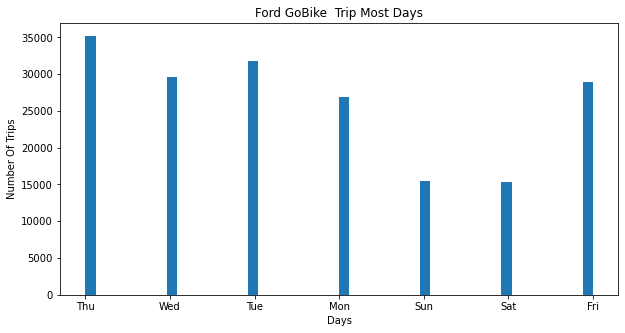

In [23]:
plt.figure(figsize=[10,5])
plt.title("Ford GoBike  Trip Most Days")
plt.xlabel('Days')
plt.ylabel('Number Of Trips');
plt.hist(data=df , x= 'weekday' , bins=50)
plt.show()


After We Found Most Day of Week For Trips ..We  Found The Most Hour is between 10:20

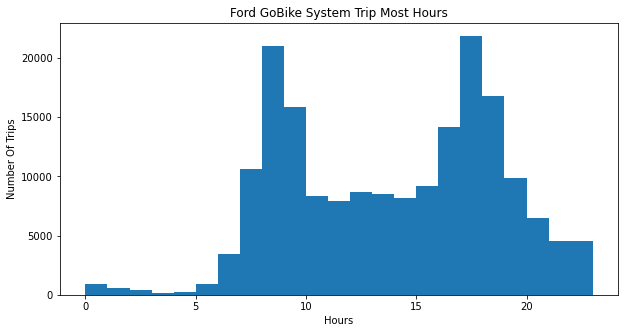

In [24]:
bins = np.arange(0, 24, 1)
plt.figure(figsize=[10,5])
plt.hist(data=df , x= 'hour' , bins=bins)
plt.title("Ford GoBike System Trip Most Hours")
plt.xlabel('Hours')
plt.ylabel('Number Of Trips');
plt.show()


We Found The Most Hour is between 10:20

Count The Trips By Duration For It By Seconds

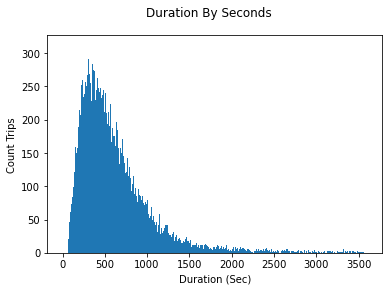

In [25]:
bins = np.arange(0, 3600, 1)
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (Sec)');
plt.ylabel('Count Trips');
plt.suptitle('Duration By Seconds');

The distribution is right-skewed, with a really long tail

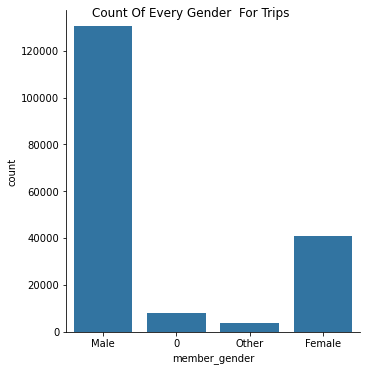

In [26]:

default_color = sb.color_palette()[0]

graph = sb.catplot(data=df, x='member_gender', kind='count', color=default_color)
plt.suptitle('Count Of Every Gender  For Trips');

# Bivariate Exploration

Comaring User Type For All Trips

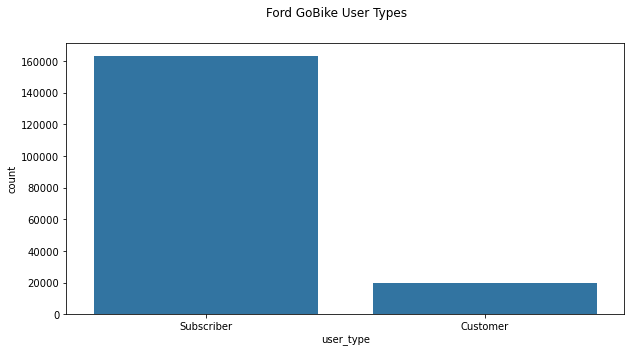

In [27]:

default_color = sb.color_palette()[0]
plt.figure(figsize = [10, 5])

sb.countplot(data = df, x = "user_type", order = df.user_type.value_counts().index,color=default_color);
plt.suptitle('Ford GoBike User Types');

Most of the users were Subscriber or Member, while the rest (10% to 15%) were Customer or just Casua



Comparing With Gender For All Trips and discover the big difference  for Male especially thursday for (male & Female)

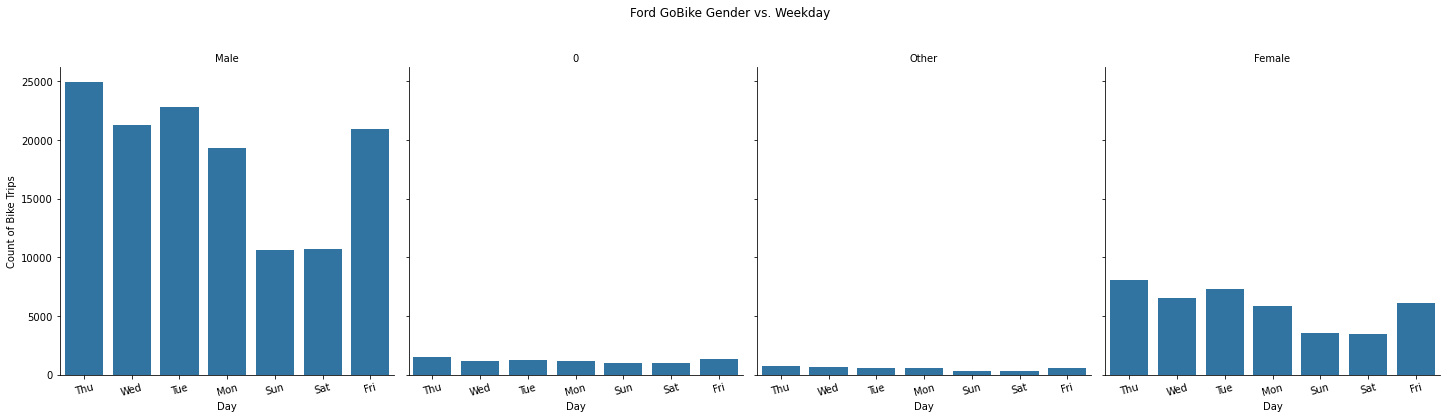

In [28]:
default_color = sb.color_palette()[0]

gender_days = sb.catplot(data=df, x='weekday', col="member_gender", kind='count', sharey = True, color=default_color);

gender_days.set_axis_labels("Day", "Count of Bike Trips");
gender_days.set_titles("{col_name}");

gender_days.fig.suptitle('Ford GoBike Gender vs. Weekday',y=1.1);
gender_days.set_xticklabels(rotation=15);

Most Of Users are Male (70%) & Others (female and unknown are 30 %).

In [29]:
df['age'].describe()

count    183412.000000
mean        125.633868
std         411.850439
min          20.000000
25%          29.000000
50%          34.000000
75%          42.000000
max        2021.000000
Name: age, dtype: float64

Comparing Ages For Riders To (Customers & Subscriber) .

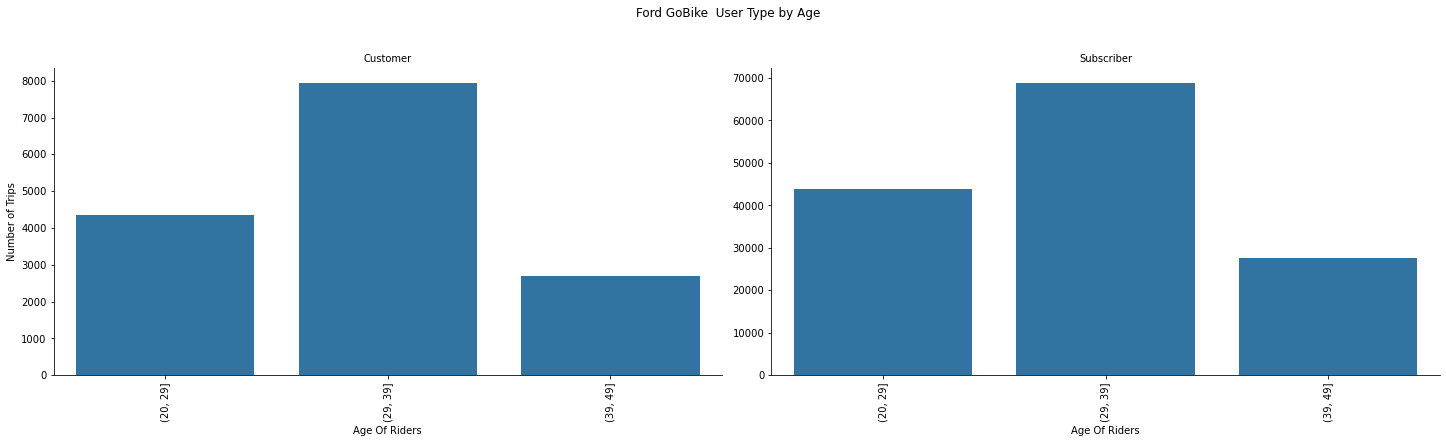

In [30]:
default_color = sb.color_palette()[0]

#age = df.query('age > 35')

user_age= sb.catplot(data=df, x = 'age_category', col='user_type', kind='count', sharey = False, color = default_color,aspect=2);

# fig, ax = plt.subplots(nrows=2, figsize = [20,8])

# sb.countplot(data = df, x = 'age', color = default_color, ax = ax[0])
# sb.countplot(data = df, x = 'user_type', color = default_color, ax = ax[1])

#sb.set(rc={'figure.figsize':(40,20)})

user_age.set_axis_labels('Age Of Riders', 'Number of Trips')
user_age.set_titles('{col_name}')

user_age.fig.suptitle('Ford GoBike  User Type by Age ', y=1.1);
user_age.set_xticklabels(rotation=90);

Age Riders Between Customer and Subscriber .. whatever the A big difference Subscriber But The Age is Most for twice is 29:39 and the Least age is 39:49 For Twice

We Here Compare Between Customers With Subscriber and found  big different .

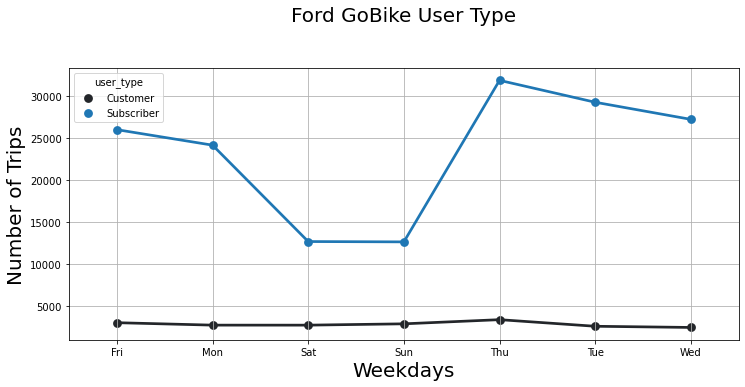

In [31]:
default_color = sb.color_palette()[0]

user_week = df.groupby(['weekday', 'user_type']).size().reset_index()
plt.figure(figsize=(12, 5))

ax = sb.pointplot(data=user_week, x='weekday', y=0, hue = 'user_type', scale=1,color=default_color);

plt.title('Ford GoBike User Type', y=1.15, fontsize=20)
plt.xlabel('Weekdays',fontsize=20)
plt.ylabel('Number of Trips', fontsize=20);
plt.grid()

We Found Subscriber is Most Users & The Most Day For ( Customers & Subscribers ) is Thursday .

# Bivariate Exploration

Next heatmap explain that the Subscriber Who in 29 to 39 is most use bike system in Friday 
and the less days that use customers in it and point plot confirm the result For Age.

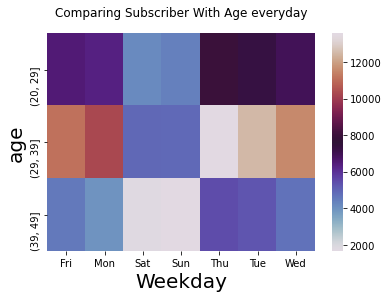

In [32]:
# Heatmap - Customers
Customer = df.query('user_type == "Subscriber"').groupby(['age_category', 'weekday'])['bike_id'].size().reset_index();
Customer = Customer.pivot('age_category', 'weekday', 'bike_id')
sb.heatmap(Customer, cmap = 'twilight')

# plt.figure(figsize=(12, 5))
plt.title("Comparing Subscriber With Age everyday", y=1.05)
plt.xlabel('Weekday', fontsize=20)
plt.ylabel('age', fontsize=20);

# plt.show()

Comparing Age Category everyday With Duration of the trip

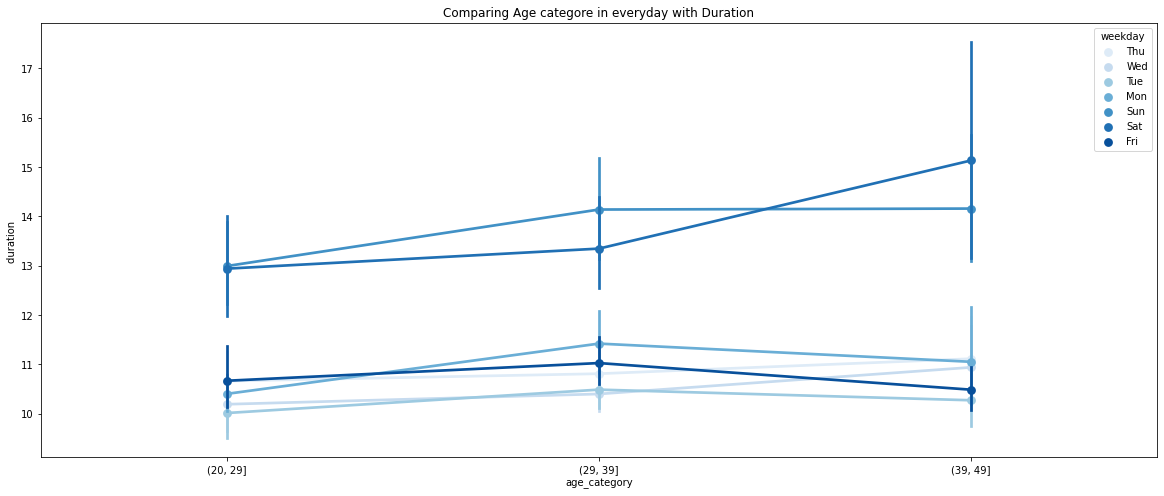

In [33]:
fig = plt.figure(figsize = [20,8])
ax = sb.pointplot(data = df, x = 'age_category', y = 'duration_by_min', hue = 'weekday',
           palette = 'Blues')
plt.title('Comparing Age categore in everyday with Duration')
plt.ylabel('duration ')
#plt.yscale('log')

#plt.set_xticklabels(rotation=90);
plt.show();

Comparing Here With User Type ( Customers & Subscribers ) Of Gender By Duration (by Min).

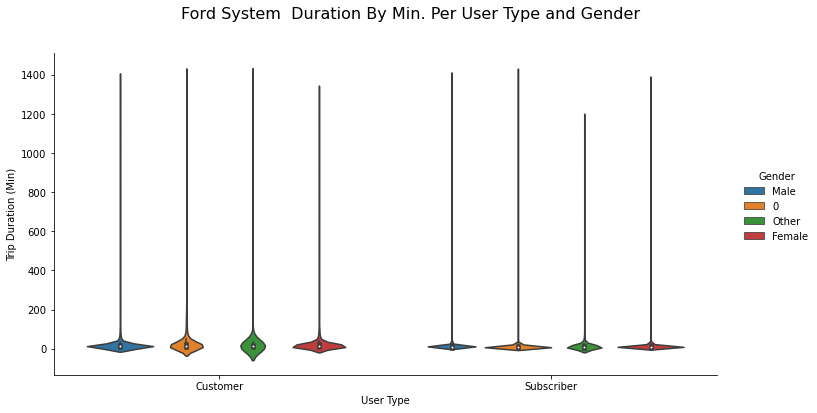

In [34]:
Duration_userType = sb.catplot(data=df, x='user_type', y="duration_by_min", hue="member_gender", kind="violin", height=5, aspect=2);

Duration_userType.set_axis_labels("User Type", "Trip Duration (Min)")
Duration_userType._legend.set_title('Gender')
Duration_userType.fig.suptitle('Ford System  Duration By Min. Per User Type and Gender', y=1.1, fontsize=16);

We Found that the male female is colse to others in (duration) whatever customer or subscriber  but in subscriber is the higher with small percentage .

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

 the previous data of exploration made different visuals and adding in more variables  comparing with  other variable
* The HeatMap explain the Most days With Most Age and this Confirmed  With The Next PointPlot 
 Age Category With Duration By Minutes through weekdays ..we discover the friday in the most day in all ages and the age from 39 to 49 & 29 to 39  is most age .

    
